Source: 
https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877
Author:
Sebastian Heinz
CEO @ STATWORX. Doing data science, stats and ML for over a decade. Food, wine and cocktail enthusiast. Check our website: https://www.statworx.com
Nov 9, 2017

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from datetime import datetime
import os.path
import re
import time
import tensorflow as tf
import pandas as pd
from collections import deque
import numpy as np
import random
from six.moves import xrange

In [4]:
df_filename = 'C:\\Users\\kinet\\OneDrive\\git\\bittensor\\data\\datasets\\df_poloniex_LTC_BTC.csv'
ss_filename = 'C:\\Users\\kinet\\OneDrive\\git\\bittensor\\data\\datasets\\ss_poloniex_LTC_BTC.csv'
data = pd.read_csv(ss_filename)

In [5]:
# add the others as other variables to the graph after it works.
#data = data.drop(['time', 'open', 'high', 'low', 'vol'], 1)
# print(data.columns)

In [6]:
n = data.shape[0]
p = data.shape[1] -1 
# Make data a numpy array
data = data.values
print(n, p)

22672 39


In [7]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data)

In [ ]:
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [8]:
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

In [9]:
# this has been upgraded
if False:
    def weight_initializer(shape):
        initial = tf.truncated_normal(shape)
        return tf.Variable(initial)

    def bias_initializer(shape):
        initial  = tf.constant(0.01,shape=shape)
        return tf.Variable(initial)

In [10]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [11]:
# Model architecture parameters
n_stocks = p
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1
# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [12]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])
# do all the other available variables as well
#V = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
#V_ = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])

In [13]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [14]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [15]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

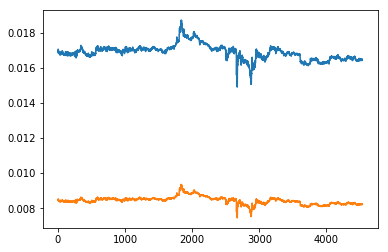

In [16]:
# Make Session
net = tf.InteractiveSession()
# Run initializer
net.run(tf.global_variables_initializer())

# Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

In [29]:
# Number of epochs and batch size
epochs = 20
batch_size = 256

In [30]:
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            # line2.set_ydata(pred)
            #line1, = ax1.plot(y_test)
            #line2, = ax1.plot(pred)
            #plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            #file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            #plt.savefig(file_name)
            #plt.pause(0.01)
# Print final MSE after Training
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

0.000113466


In [19]:
pred = net.run(out, feed_dict={X: X_test})

In [27]:
print(len(pred[0]))

4534


In [26]:
#print(pred)
for i in pred[0]:
    print(i)

-5.70316
-6.27228
-4.39366
-3.15791
-3.49404
-3.64327
-4.06104
-4.14484
-4.51055
-3.95297
-4.09091
-4.02873
-3.66306
-4.16066
-4.03691
-3.3799
-3.12581
-3.7123
-3.72742
-3.52263
-4.11558
-3.70854
-3.59023
-3.45137
-3.75245
-3.71659
-2.88069
-3.30366
-3.20161
-2.99378
-2.78941
-3.21458
-2.97351
-2.55443
-2.97541
-2.91699
-2.7747
-2.77327
-3.18208
-2.89193
-2.71312
-3.14378
-2.99514
-3.31693
-3.14405
-2.61746
-2.91169
-2.744
-2.75211
-3.14282
-4.27129
-4.79924
-4.17213
-4.05227
-4.59636
-4.7374
-4.06468
-4.82556
-4.54039
-3.55688
-3.53034
-4.52523
-4.49948
-3.82504
-4.00366
-4.28177
-4.19126
-3.99119
-4.25258
-4.195
-2.99324
-2.51971
-2.82319
-2.93013
-2.35894
-2.31476
-2.67357
-2.4147
-2.6506
-2.90469
-3.03088
-2.73299
-3.08575
-3.20598
-2.93239
-3.03677
-3.0611
-3.00144
-2.52394
-2.88925
-3.07291
-2.93686
-3.41077
-3.41445
-3.27465
-3.25535
-3.42456
-3.33045
-3.21064
-3.10766
-3.49577
-3.11088
-2.93435
-3.33538
-3.22506
-3.47049
-3.82183
-3.62986
-3.29881
-3.28909
-3.32546
-3.48054
-3.

-1.17193
-1.54237
-1.61528
-1.55182
-1.67981
-1.50134
-1.41095
-1.34287
-1.57344
-1.50822
-1.16267
-1.04942
-1.12333
-1.14185
-1.05803
-1.09947
-1.18906
-0.983651
-0.77732
-0.999041
-0.897506
-0.861201
-0.853299
-0.84512
-0.741728
-0.734501
-0.69312
-0.784241
-0.493724
-0.56398
-0.597817
-0.675662
-0.643833
-0.690273
-0.786158
-1.68414
-1.65653
-1.6504
-1.55281
-1.71537
-1.40292
-2.06364
-2.14528
-2.18486
-1.58931
-1.92098
-1.99055
-1.8324
-2.27531
-2.35593
-1.90543
-1.89748
-2.07986
-2.05366
-2.13268
-1.57525
-1.53263
-1.47309
-1.43856
-1.35795
-1.4917
-0.691504
-0.746906
-0.89852
-0.834468
-0.713121
-0.86733
-1.22035
-1.79237
-1.63237
-1.5947
-1.71182
-1.54705
-1.50647
-1.6737
-1.74931
-1.7137
-1.38979
-1.4283
-1.79405
-1.57797
-1.7373
-1.68053
-1.49045
-1.46291
-1.38834
-1.5275
-1.51826
-0.899681
-0.931329
-0.792793
-0.936128
-0.855249
-0.850299
-0.969643
-0.864995
-0.72288
-0.643684
-0.827966
-0.807243
-0.917292
-0.887522
-0.929779
-0.913617
-0.941292
-0.897769
-1.06213
-0.499729
-